In [1]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fiona.listlayers('/dsa/data/geospatial/Prairie/tm_stats.gdb')

['fishnet_tm_stats', 'FinalTable', 'Final']

In [3]:
plots_gdf = gpd.read_file("/dsa/data/geospatial/Prairie/tm_stats.gdb", layer='FinalTable')

In [4]:
plots_gdf.head()


,mean_B1_1983_8,stdev_B1_1983_8,min_B1_1983_8,max_B1_1983_8,mean_B2_1983_8,stdev_B2_1983_8,min_B2_1983_8,max_B2_1983_8,mean_B3_1983_8,stdev_B3_1983_8,...,min_B6_2010_10,max_B6_2010_10,Shape_Length,Shape_Area,Burn_1995_09,Burn_1996_06,Burn_2009_07,Burn_2010_10,Burn_1999_05,geometry
0,1712.5000,3687.547351,0.0,9785.0,1931.8125,4165.967614,0.0,11318.0,1915.8125,4132.417827,...,1184.0,1887.0,480.0,14400.0,1,1,1,1,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245..."
1,6683.6250,4007.790894,0.0,9784.0,7579.2500,4556.673999,0.0,11317.0,7305.4375,4412.676179,...,1308.0,1928.0,480.0,14400.0,1,1,1,1,1,"MULTIPOLYGON (((706365.000 4326765.000, 706365..."
2,6685.5000,4012.358126,0.0,9647.0,7612.9375,4582.594367,0.0,11455.0,7416.2500,4508.857675,...,1308.0,1969.0,480.0,14400.0,1,1,1,1,1,"MULTIPOLYGON (((706485.000 4326765.000, 706485..."
3,6497.1875,3883.217759,0.0,9239.0,7386.2500,4416.118605,0.0,10486.0,7072.1250,4244.029357,...,1102.0,1680.0,480.0,14400.0,1,1,1,1,1,"MULTIPOLYGON (((706605.000 4326765.000, 706605..."
4,6566.4375,3956.069025,0.0,10112.0,7462.5625,4506.863255,0.0,11591.0,7133.2500,4350.953666,...,936.0,1845.0,480.0,14400.0,1,1,1,1,1,"MULTIPOLYGON (((706725.000 4326765.000, 706725..."


In [5]:
plots_gdf.columns

Index(['mean_B1_1983_8', 'stdev_B1_1983_8', 'min_B1_1983_8', 'max_B1_1983_8',
       'mean_B2_1983_8', 'stdev_B2_1983_8', 'min_B2_1983_8', 'max_B2_1983_8',
       'mean_B3_1983_8', 'stdev_B3_1983_8',
       ...
       'min_B6_2010_10', 'max_B6_2010_10', 'Shape_Length', 'Shape_Area',
       'Burn_1995_09', 'Burn_1996_06', 'Burn_2009_07', 'Burn_2010_10',
       'Burn_1999_05', 'geometry'],
      dtype='object', length=1278)

In [6]:
plots_gdf.geometry.head()

0    MULTIPOLYGON (((706245.000 4326765.000, 706245...
1    MULTIPOLYGON (((706365.000 4326765.000, 706365...
2    MULTIPOLYGON (((706485.000 4326765.000, 706485...
3    MULTIPOLYGON (((706605.000 4326765.000, 706605...
4    MULTIPOLYGON (((706725.000 4326765.000, 706725...
Name: geometry, dtype: geometry

In [7]:
slim = gpd.GeoDataFrame({'OBJECTID':plots_gdf.index, 'geometry':plots_gdf.geometry},
                       geometry='geometry')
slim['OBJECTID'] = slim['OBJECTID'] + 1
slim.head()

,OBJECTID,geometry
0,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245..."
1,2,"MULTIPOLYGON (((706365.000 4326765.000, 706365..."
2,3,"MULTIPOLYGON (((706485.000 4326765.000, 706485..."
3,4,"MULTIPOLYGON (((706605.000 4326765.000, 706605..."
4,5,"MULTIPOLYGON (((706725.000 4326765.000, 706725..."


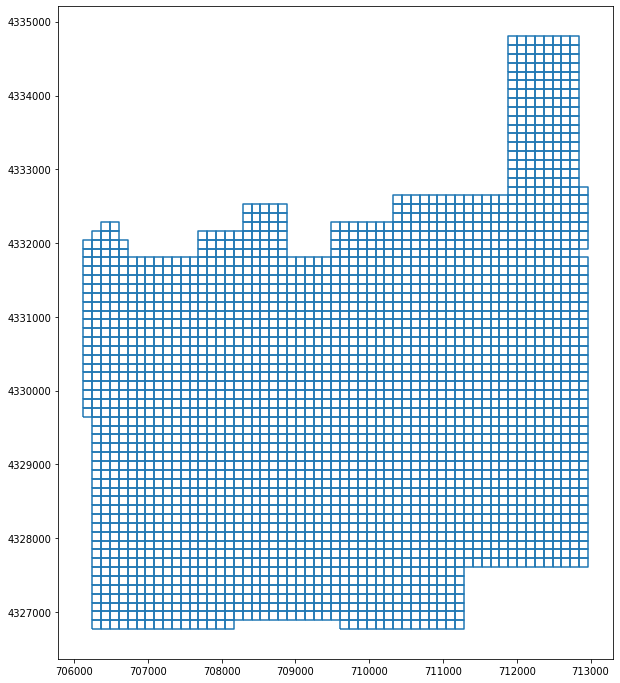

In [8]:
#fig, ax = plt.subplots(1, 1)

#plt.figure(figsize=(20,20))
plt.rcParams['figure.figsize'] = [12,12]

slim.boundary.plot()

In [9]:
slim.to_file("Plot_Polygons")

In [10]:
del plots_gdf

# Read in Stacked Data

In [12]:
import pandas as pd

In [14]:
stacked = pd.read_csv('FullStacked_data.csv')

In [15]:
stacked.head()

,Unnamed: 0,OBJECTID,YrMo,mean_B1,stdev_B1,min_B1,max_B1,mean_B2,stdev_B2,min_B2,...,max_B4,mean_B5,stdev_B5,min_B5,max_B5,mean_B6,stdev_B6,min_B6,max_B6,isBurnt
0,0,1,1983_8,1712.5000,3687.5474,0.0,9785.0,1931.8125,4165.9680,0.0,...,17814.0,2992.1875,6438.5073,0.0,16687.0,2364.6875,5101.7960,0.0,13821.0,1
1,1,1,1984_9,1816.9375,3907.9340,0.0,10046.0,2020.5000,4349.1140,0.0,...,16276.0,3253.5625,6995.8360,0.0,17642.0,2594.4375,5580.8374,0.0,14371.0,1
2,2,1,1985_4,1723.6250,3710.4200,0.0,9773.0,1918.0625,4129.8690,0.0,...,18473.0,3078.6250,6626.8896,0.0,17401.0,2356.1250,5080.6260,0.0,13745.0,1
3,3,1,1985_9,1940.4375,4173.4126,0.0,10694.0,2124.0625,4570.8594,0.0,...,14949.0,3430.0000,7376.2800,0.0,18565.0,2845.8125,6120.1830,0.0,15478.0,1
4,4,1,1986_3,1908.4375,4105.3920,0.0,10604.0,2118.5000,4557.8813,0.0,...,15721.0,3633.9375,7816.1616,0.0,19983.0,2961.2500,6372.7680,0.0,16607.0,1


In [16]:
plots_gdf = slim.merge(stacked,on='OBJECTID',how='right')
plots_gdf.head()

,OBJECTID,geometry,Unnamed: 0,YrMo,mean_B1,stdev_B1,min_B1,max_B1,mean_B2,stdev_B2,...,max_B4,mean_B5,stdev_B5,min_B5,max_B5,mean_B6,stdev_B6,min_B6,max_B6,isBurnt
0,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245...",0,1983_8,1712.5000,3687.5474,0.0,9785.0,1931.8125,4165.9680,...,17814.0,2992.1875,6438.5073,0.0,16687.0,2364.6875,5101.7960,0.0,13821.0,1
1,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245...",1,1984_9,1816.9375,3907.9340,0.0,10046.0,2020.5000,4349.1140,...,16276.0,3253.5625,6995.8360,0.0,17642.0,2594.4375,5580.8374,0.0,14371.0,1
2,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245...",2,1985_4,1723.6250,3710.4200,0.0,9773.0,1918.0625,4129.8690,...,18473.0,3078.6250,6626.8896,0.0,17401.0,2356.1250,5080.6260,0.0,13745.0,1
3,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245...",3,1985_9,1940.4375,4173.4126,0.0,10694.0,2124.0625,4570.8594,...,14949.0,3430.0000,7376.2800,0.0,18565.0,2845.8125,6120.1830,0.0,15478.0,1
4,1,"MULTIPOLYGON (((706245.000 4326765.000, 706245...",4,1986_3,1908.4375,4105.3920,0.0,10604.0,2118.5000,4557.8813,...,15721.0,3633.9375,7816.1616,0.0,19983.0,2961.2500,6372.7680,0.0,16607.0,1


In [17]:
print(plots_gdf.YrMo.unique())

['1983_8' '1984_9' '1985_4' '1985_9' '1986_3' '1987_4' '1987_8' '1988_4'
 '1988_8' '1989_2' '1989_8' '1990_5' '1990_8' '1991_4' '1991_8' '1992_4'
 '1993_4' '1993_8' '1994_3' '1994_8' '1995_4' '1995_9' '1996_4' '1996_6'
 '1997_3' '1997_8' '1998_4' '1998_8' '1999_5' '2000_4' '2000_6' '2001_4'
 '2001_8' '2002_5' '2003_4' '2003_7' '2004_3' '2004_8' '2005_5' '2006_4'
 '2006_7' '2007_4' '2007_8' '2008_4' '2008_8' '2009_5' '2009_7' '2010_4'
 '2010_10' '2011_4' '2011_8']


1983_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1983_8'


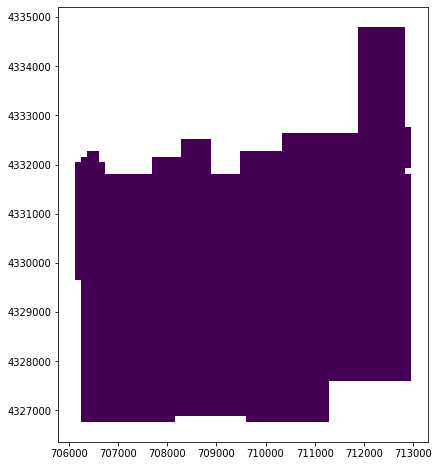

1984_9
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1984_9'


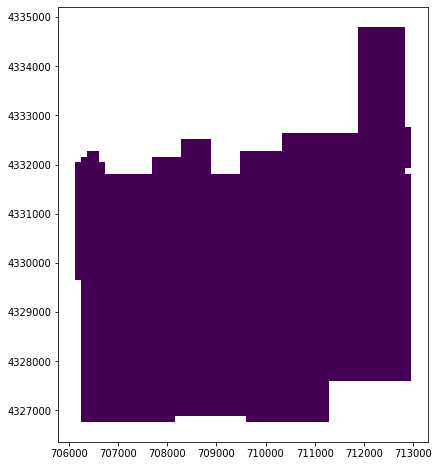

1985_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1985_4'


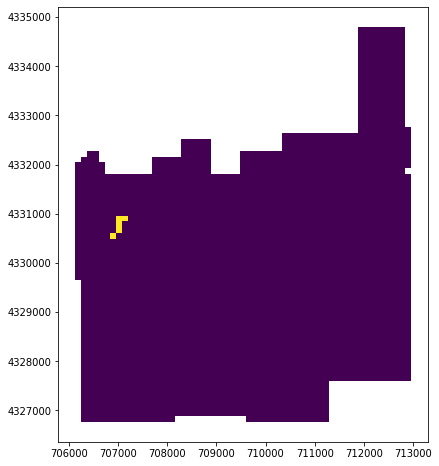

1985_9
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1985_9'


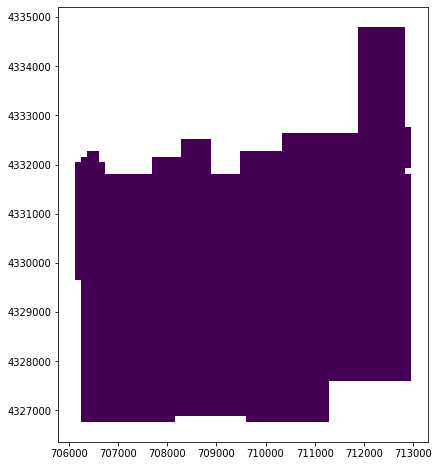

1986_3
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1986_3'


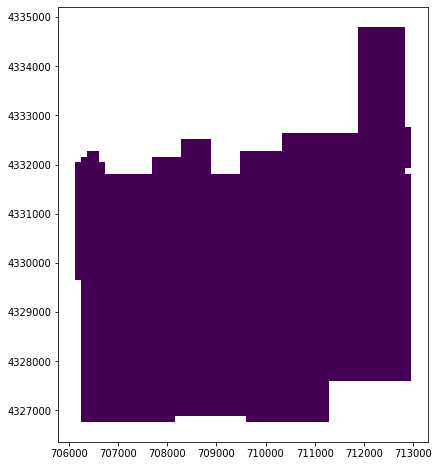

1987_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1987_4'


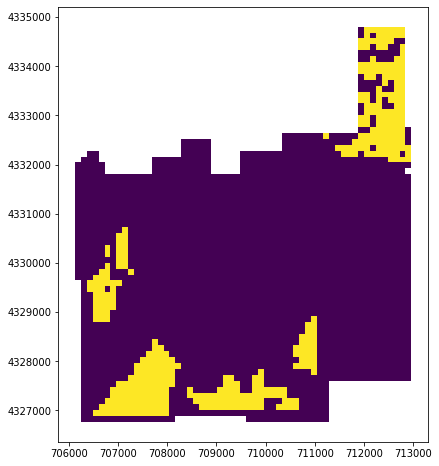

1987_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1987_8'


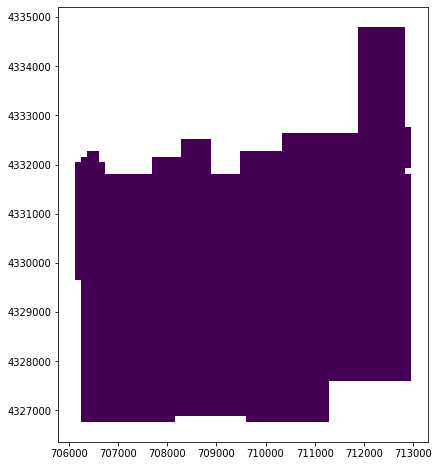

1988_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1988_4'


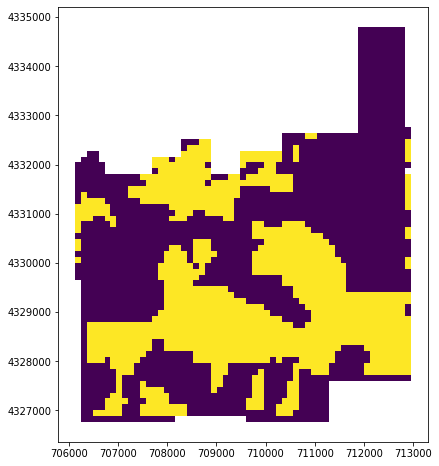

1988_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1988_8'


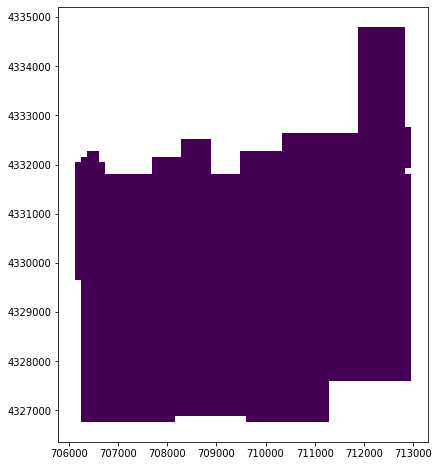

1989_2
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1989_2'


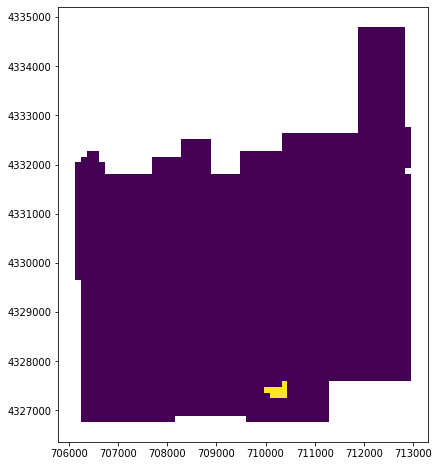

1989_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1989_8'


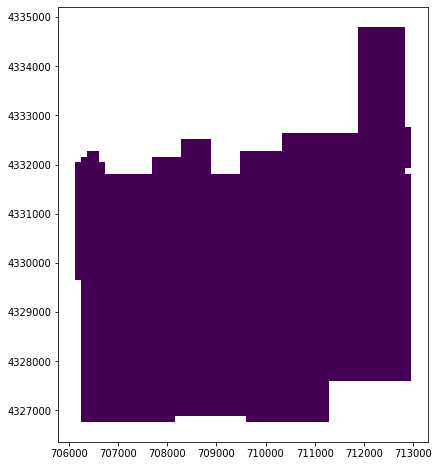

1990_5
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1990_5'


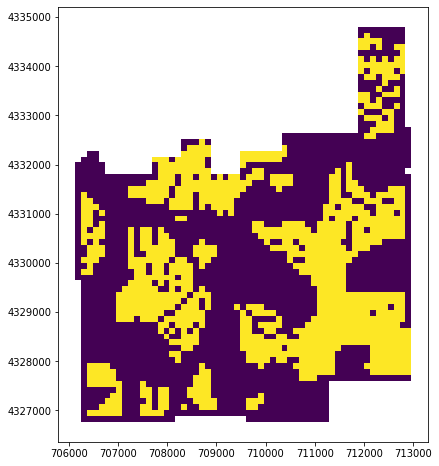

1990_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1990_8'


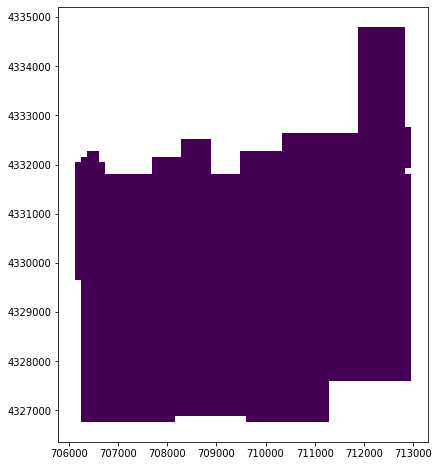

1991_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1991_4'


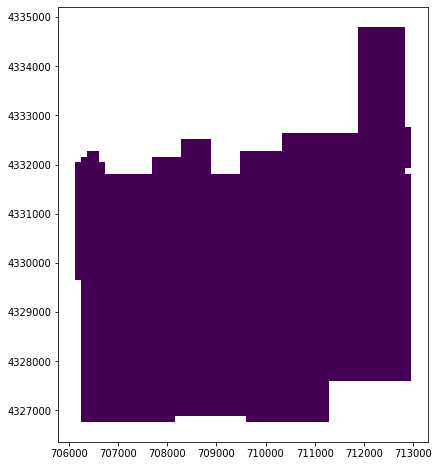

1991_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1991_8'


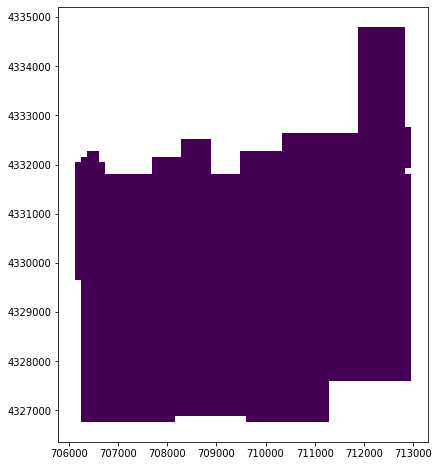

1992_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1992_4'


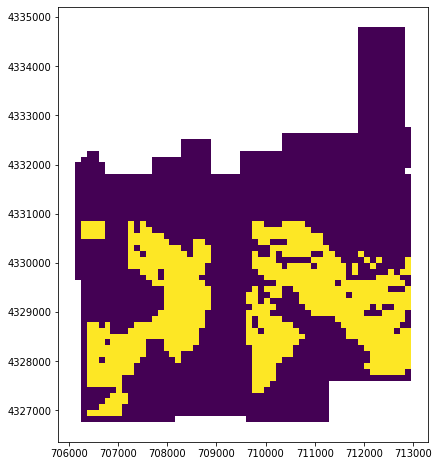

1993_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1993_4'


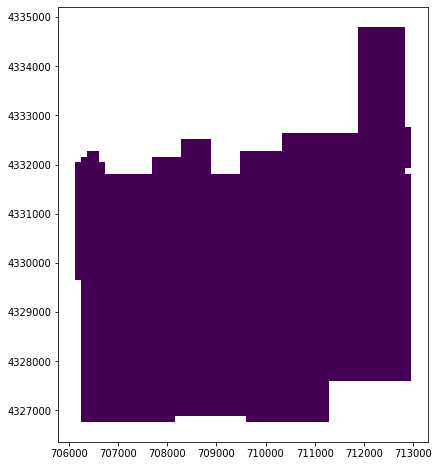

1993_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1993_8'


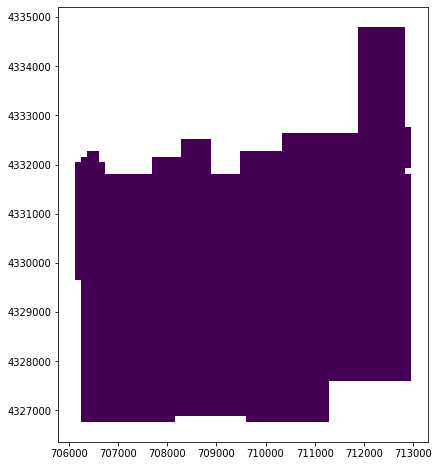

1994_3
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1994_3'


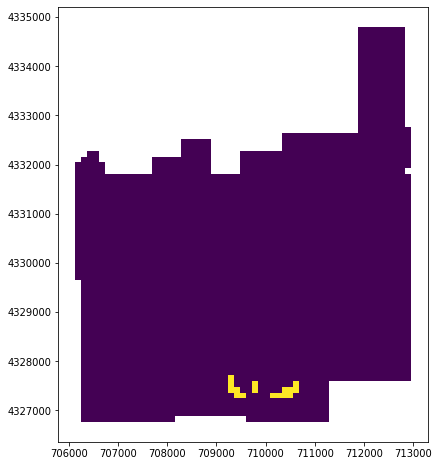

1994_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1994_8'


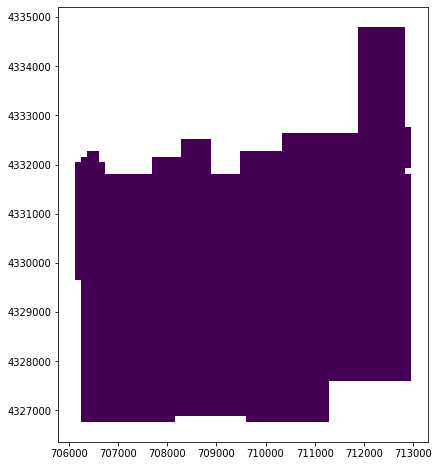

1995_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1995_4'


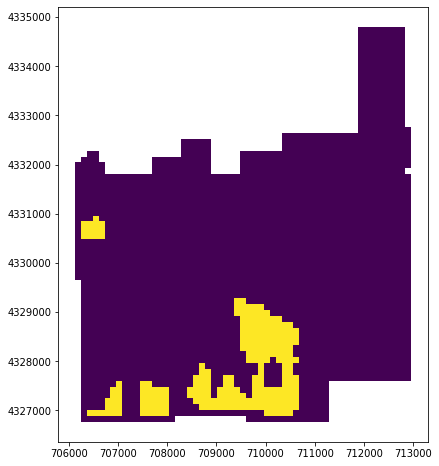

1995_9
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1995_9'


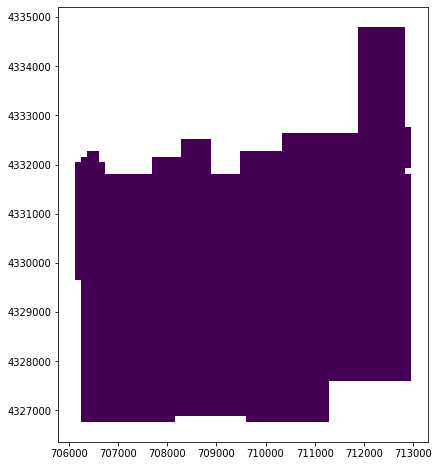

1996_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1996_4'


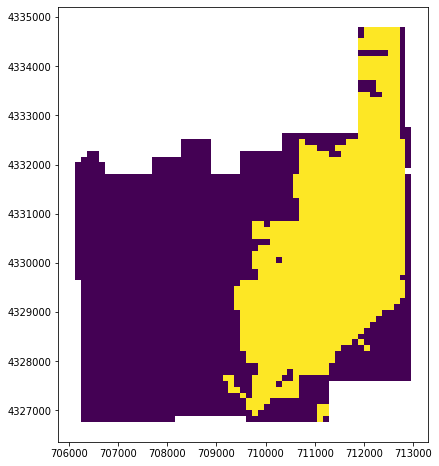

1996_6
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1996_6'


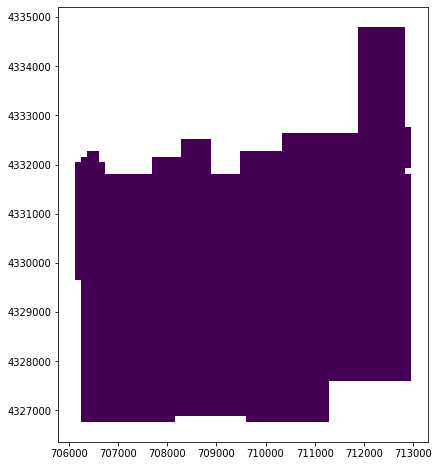

1997_3
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1997_3'


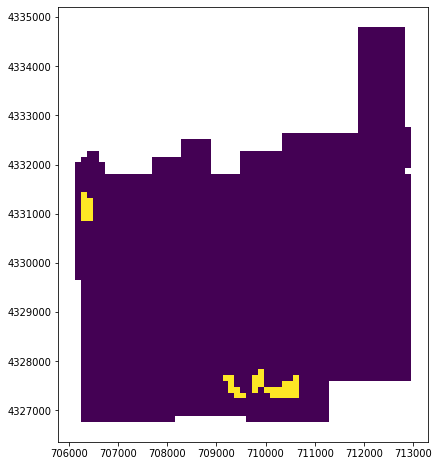

1997_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1997_8'


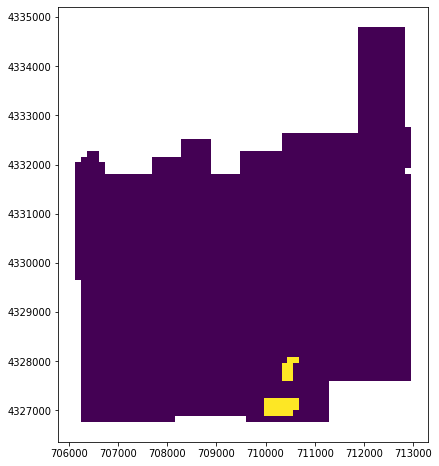

1998_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1998_4'


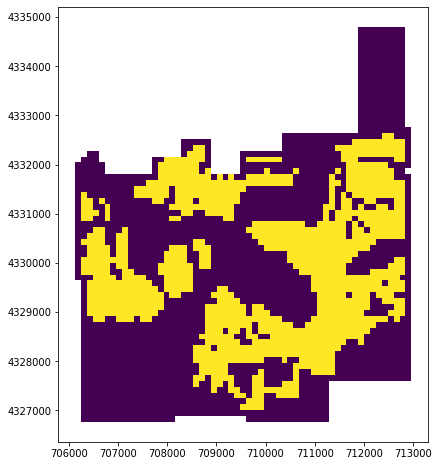

1998_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1998_8'


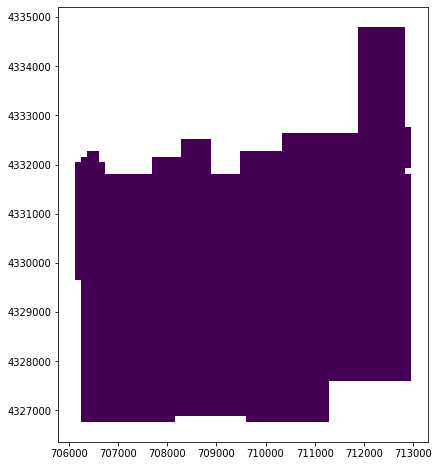

1999_5
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_1999_5'


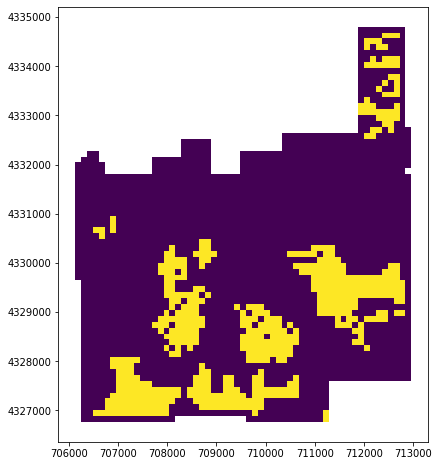

2000_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2000_4'


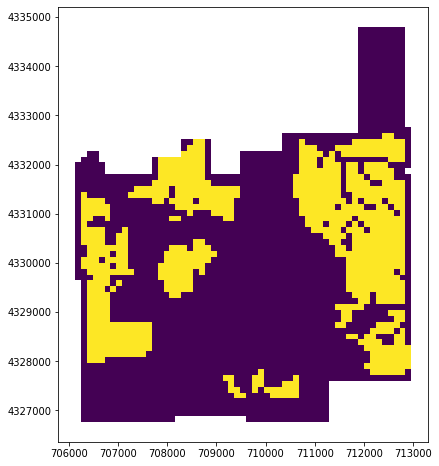

2000_6
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2000_6'


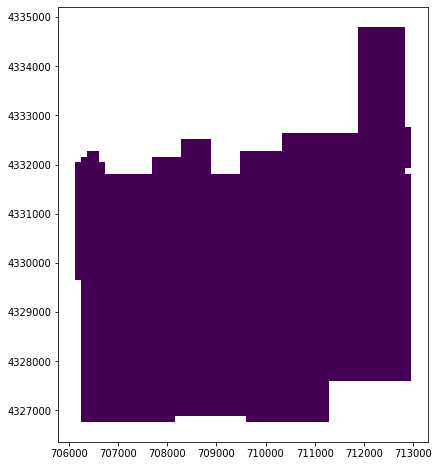

2001_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2001_4'


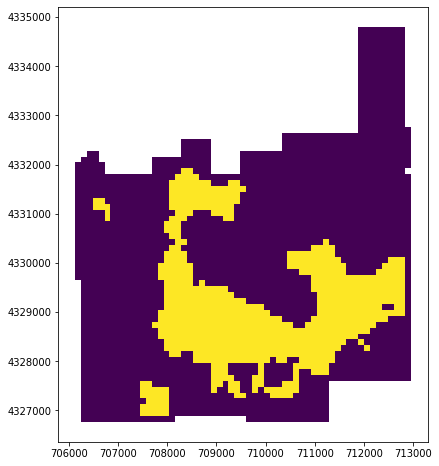

2001_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2001_8'


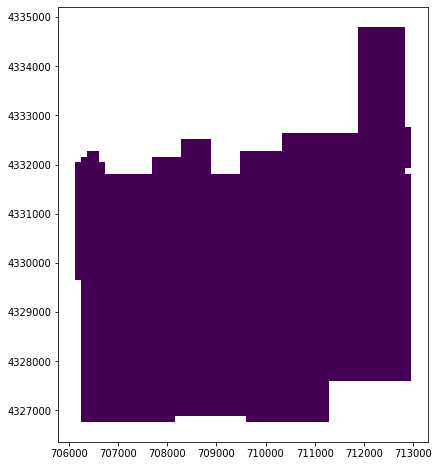

2002_5
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2002_5'


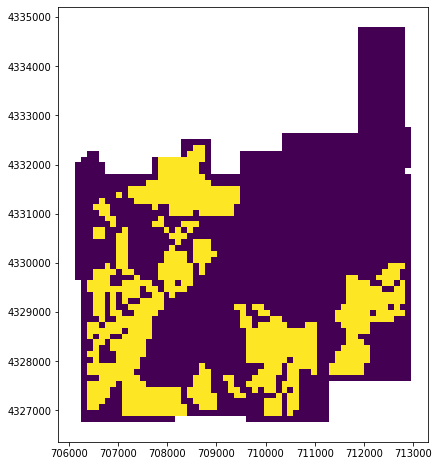

2003_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2003_4'


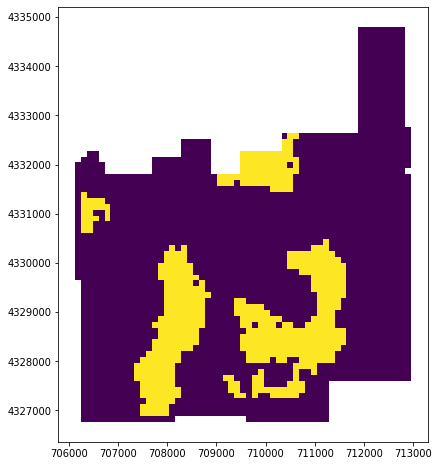

2003_7
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2003_7'


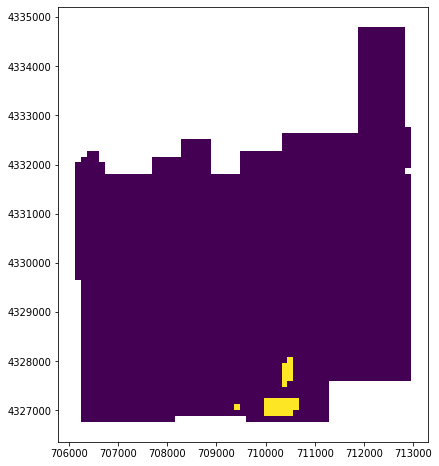

2004_3
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2004_3'


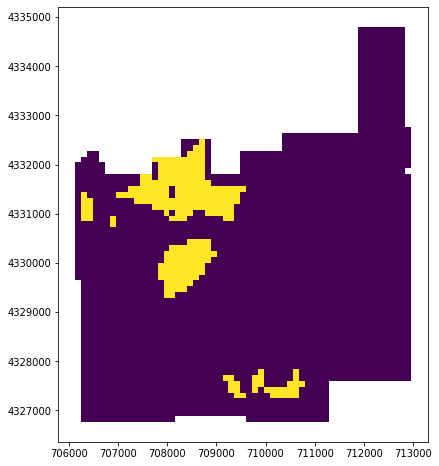

2004_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2004_8'


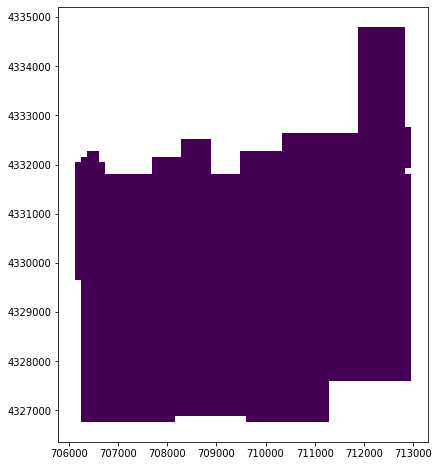

2005_5
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2005_5'


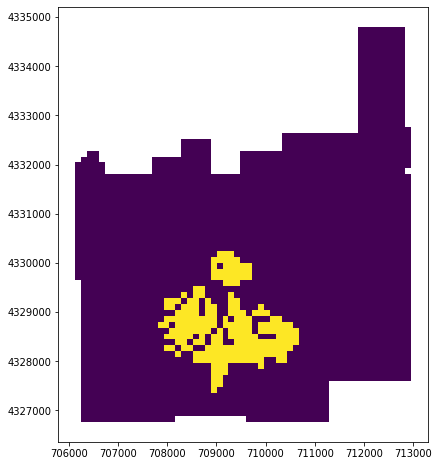

2006_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2006_4'


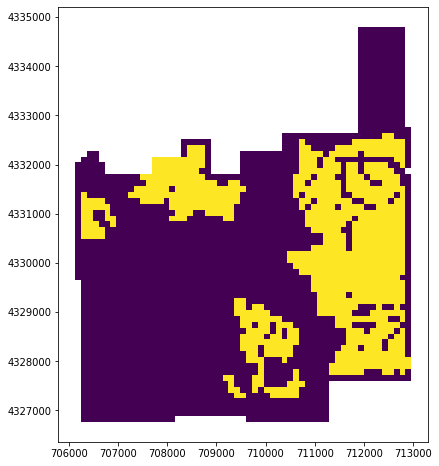

2006_7
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2006_7'


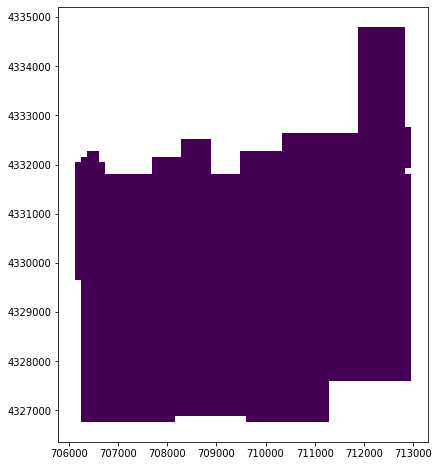

2007_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2007_4'


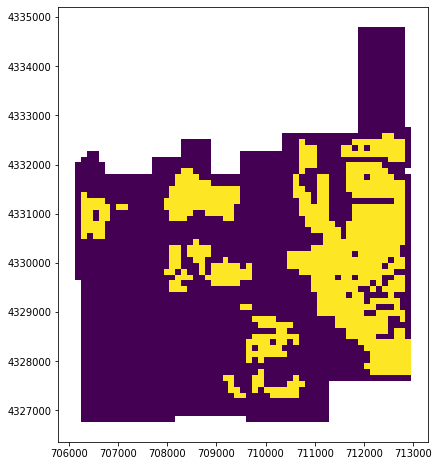

2007_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2007_8'


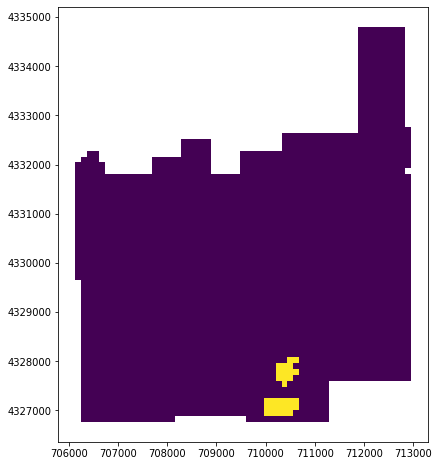

2008_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2008_4'


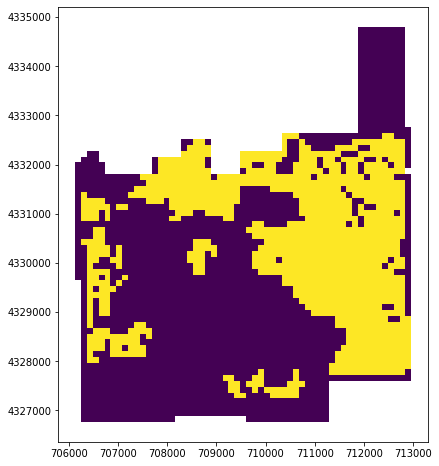

2008_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2008_8'


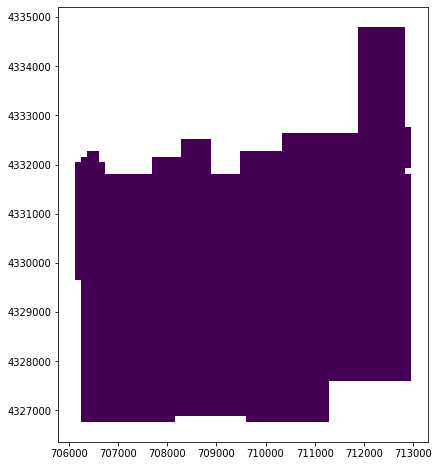

2009_5
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2009_5'


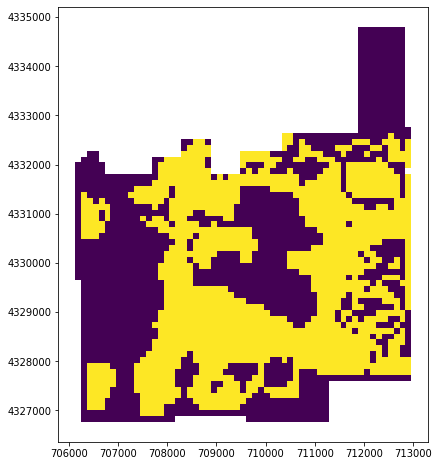

2009_7
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2009_7'


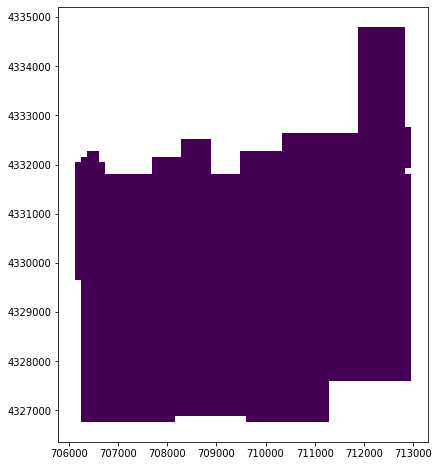

2010_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2010_4'


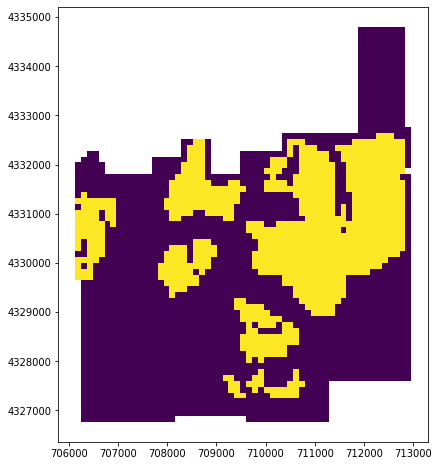

2010_10
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2010_10'


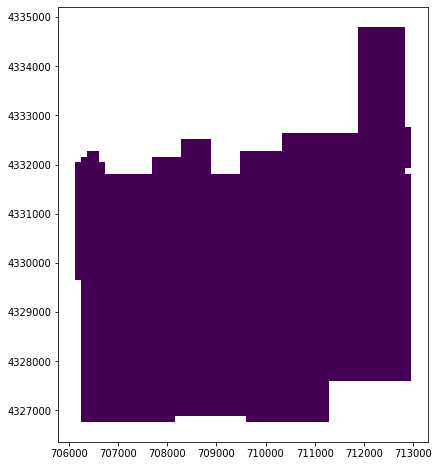

2011_4
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2011_4'


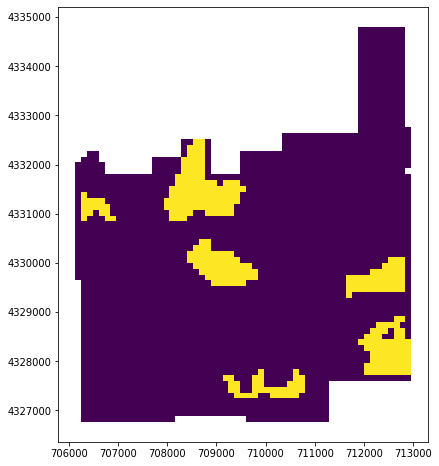

2011_8
(2646, 29)
Saving ShapeFile : 'YrMo_Shapes/Burn_Plots_2011_8'


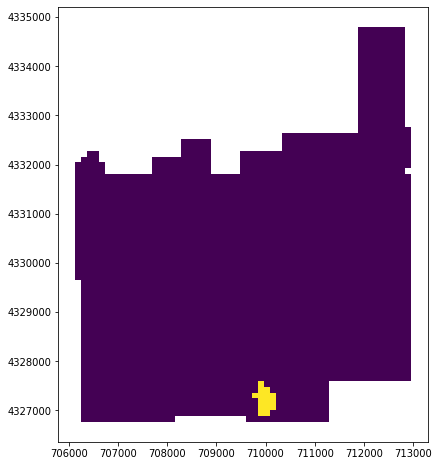

In [20]:
# Prior to running this step make sure you create the YrMo_Shapes folder in your workspace!!
# It is required for storage of the burn plots for each burn


plt.rcParams['figure.figsize'] = [8,8]

for yrmo in plots_gdf.YrMo.unique():
    print(yrmo)
    shapeName = "YrMo_Shapes/Burn_Plots_{}".format(yrmo)
    tmp = plots_gdf[plots_gdf['YrMo'] == yrmo]
    print(tmp.shape)
    print("Saving ShapeFile : '{}'".format(shapeName))
    tmp.to_file(shapeName)
    tmp.plot(column='isBurnt')
    plt.show()
